<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/Geospasial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

<Axes: >

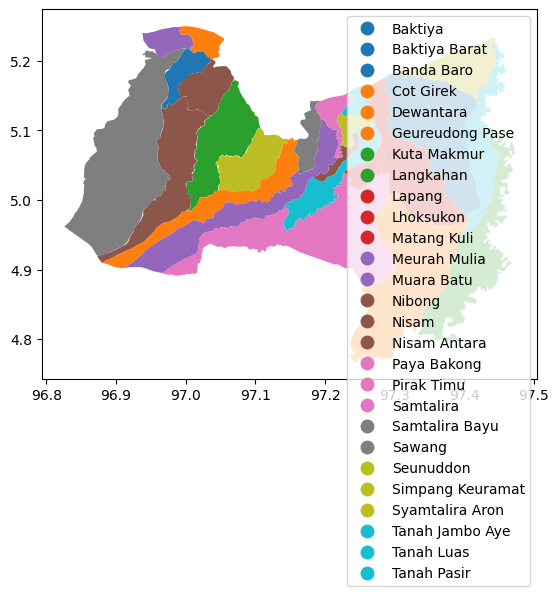

In [15]:
dt=gpd.read_file('Aceh_utara.zip')
dt.plot(column='nama', legend=True )

/tmp/ipython-input-2014635938.py:24: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=ax, color=color, edgecolor='black')


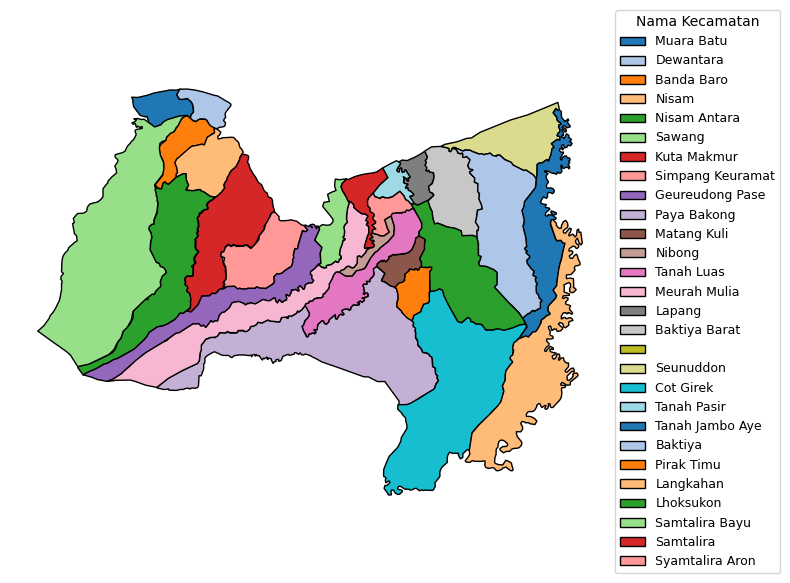

In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch

# Baca data shapefile Aceh Utara
dt = gpd.read_file("Aceh_utara.zip")

# Buat figura
fig, ax = plt.subplots(figsize=(8, 6))

# Daftar nama kecamatan unik
unique_names = dt['nama'].unique()

# Pilih palet warna
colors = plt.cm.tab20.colors  # Bisa juga tab10, Set3, Paired, dll

# Simpan handle legend
legend_elements = []

# Plot tiap kecamatan dengan warna berbeda
for i, name in enumerate(unique_names):
    subset = dt[dt['nama'] == name]
    color = colors[i % len(colors)]
    subset.plot(ax=ax, color=color, edgecolor='black')
    legend_elements.append(Patch(facecolor=color, edgecolor='black', label=name))

# Tambahkan legend di luar peta
ax.legend(handles=legend_elements, title="Nama Kecamatan",
          loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, title_fontsize=10)

# Hilangkan axis
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [4]:
dt.head()

,kode,nama,luas,geometry
0,01,Muara Batu,NaN,"POLYGON ((96.93725 5.23983, 96.94444 5.23954, ..."
1,02,Dewantara,NaN,"POLYGON ((96.99523 5.2494, 96.99835 5.2494, 97..."
2,03,Banda Baro,NaN,"POLYGON ((97.00106 5.21786, 97.00106 5.21786, ..."
3,04,Nisam,NaN,"POLYGON ((97.0357 5.20316, 97.03987 5.20115, 9..."
4,05,Nisam Antara,NaN,"POLYGON ((96.96507 5.13538, 96.96511 5.13558, ..."
